In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading microstructures and masks
path = 'C:\\Users\\kevin\\Desktop\\CMS\\Steel Image\\data\\'
inputs = []
masks = []
for image in os.listdir(path+'images'):
    img = cv2.imread(path+'images\\'+image, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64,64))
    inputs.append(img)
    
inputs = np.array(inputs)

for image in os.listdir(path+'masks'):
    img = cv2.imread(path+'masks\\'+image, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64,64))
    masks.append(img)
    
masks = np.array(masks)

In [3]:
#normalizing data
inputs = inputs/255
masks = masks/255

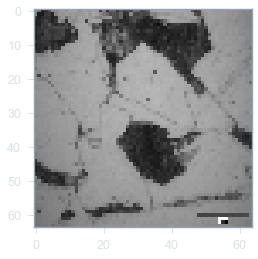

In [4]:
plt.imshow(inputs[0], cmap = 'gray')

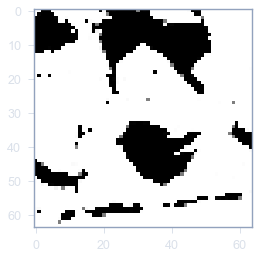

In [5]:
plt.imshow(masks[0], cmap = 'gray')

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
64*64

4096

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[64,64]))
encoder.add(Dense(3750, activation='sigmoid'))
encoder.add(Dense(3500, activation='sigmoid'))
encoder.add(Dense(3250, activation='sigmoid'))
encoder.add(Dense(3000, activation='sigmoid'))
encoder.add(Dense(2750, activation='sigmoid'))
encoder.add(Dense(2500, activation='sigmoid'))
encoder.add(Dense(2250, activation='sigmoid'))
encoder.add(Dense(2000, activation='sigmoid'))
encoder.add(Dense(1750, activation='sigmoid'))
encoder.add(Dense(1500, activation='sigmoid'))
encoder.add(Dense(1250, activation='sigmoid'))
encoder.add(Dense(1000, activation='sigmoid'))
encoder.add(Dense(750, activation='sigmoid'))
encoder.add(Dense(500, activation='sigmoid'))

In [9]:
decoder = Sequential()
decoder.add(Dense(750, activation='sigmoid', input_shape=[500]))
decoder.add(Dense(1000, activation='sigmoid'))
decoder.add(Dense(1250, activation='sigmoid'))
decoder.add(Dense(1500, activation='sigmoid'))
decoder.add(Dense(1750, activation='sigmoid'))
decoder.add(Dense(2000, activation='sigmoid'))
decoder.add(Dense(2250, activation='sigmoid'))
decoder.add(Dense(2500, activation='sigmoid'))
decoder.add(Dense(2750, activation='sigmoid'))
decoder.add(Dense(3000, activation='sigmoid'))
decoder.add(Dense(3250, activation='sigmoid'))
decoder.add(Dense(3500, activation='sigmoid'))
decoder.add(Dense(3750, activation='sigmoid'))
decoder.add(Dense(4096, activation='sigmoid'))
decoder.add(Reshape([64,64]))

In [10]:
autoencoder = Sequential([encoder, decoder])

In [11]:
autoencoder.compile(loss='binary_crossentropy', 
                    optimizer='adam',
                    metrics = ['accuracy'])

In [12]:
autoencoder.fit(inputs, masks, epochs=50)

Train on 12 samples
Epoch 1/50
12/12 [==============================] - 4s 321ms/sample - loss: 0.7209 - accuracy: 0.4831
Epoch 2/50
12/12 [==============================] - 1s 112ms/sample - loss: 0.4899 - accuracy: 0.7651
Epoch 3/50
12/12 [==============================] - 1s 114ms/sample - loss: 0.4774 - accuracy: 0.7688
Epoch 4/50
12/12 [==============================] - 1s 118ms/sample - loss: 0.4677 - accuracy: 0.7669
Epoch 5/50
12/12 [==============================] - 1s 120ms/sample - loss: 0.4639 - accuracy: 0.7642
Epoch 6/50
12/12 [==============================] - 1s 115ms/sample - loss: 0.4633 - accuracy: 0.7658
Epoch 7/50
12/12 [==============================] - 1s 116ms/sample - loss: 0.4606 - accuracy: 0.7682
Epoch 8/50
12/12 [==============================] - 1s 123ms/sample - loss: 0.4572 - accuracy: 0.7693
Epoch 9/50
12/12 [==============================] - 1s 121ms/sample - loss: 0.4564 - accuracy: 0.7701
Epoch 10/50
12/12 [==============================] - 2s 128ms/

In [16]:
passed_images = inputs[:11]

In [17]:
constructed_masks = autoencoder.predict(passed_images)

ORIGINAL IMAGE


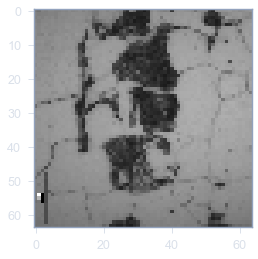

CONSTRUCTED MASK


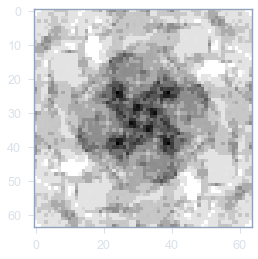

In [18]:
n=10
print('ORIGINAL IMAGE')
plt.imshow(inputs[n], cmap='gray')
plt.show()

print('CONSTRUCTED MASK')
plt.imshow(constructed_masks[n], cmap='gray')